# Instalar librerias

In [1]:
%pip install jupyter numpy pandas matplotlib seaborn scikit-learn tensorflow torch 


Note: you may need to restart the kernel to use updated packages.


# Cargar librerías necesarias

In [1]:

import numpy as np  
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


## Cargar los datos

In [2]:

# Ruta del archivo CSV (ajusta según la ubicación en tu equipo)
dataset_path = "../100_Batches_IndPenSim_V3.csv"


dataset = pd.read_csv(dataset_path)
# Mostrar las primeras filas del dataset
dataset.head()


,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,210,209,208,207,206,205,204,203,202,201
0,0.2,30,100,8,0.0000,30.118,9.8335,0.0001,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,0.4,30,100,8,0.0000,51.221,18.1550,0.0001,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,0.6,30,100,8,0.0000,54.302,9.5982,0.0001,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,0.8,30,100,8,0.0000,37.816,4.3395,0.0001,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,1.0,30,100,8,0.5181,18.908,1.1045,0.0001,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


## Análisis exploratorio

In [3]:
# Información general
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113935 entries, 0 to 113934
Columns: 2239 entries, Time (h) to 201
dtypes: float64(2225), int64(14)
memory usage: 1.9 GB


In [4]:
# Estadística descriptiva
dataset.describe()

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,210,209,208,207,206,205,204,203,202,201
count,113935.000000,113935.000000,113935.0,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,...,1.139350e+05,1.139350e+05,1.139350e+05,1.139350e+05,1.139350e+05,1.139350e+05,1.139350e+05,1.139350e+05,0.0,0.0
mean,114.750656,65.246360,100.0,76.663764,0.073209,61.334389,74.346341,20.763025,154.811954,0.945026,...,1.414688e+06,1.422458e+06,1.429568e+06,1.435311e+06,1.439196e+06,1.441100e+06,1.441329e+06,1.440539e+06,NaN,NaN
std,66.990504,11.690215,0.0,25.680134,0.552788,44.972713,108.022600,50.230266,155.601474,0.134269,...,6.561401e+05,6.569029e+05,6.576540e+05,6.583792e+05,6.590689e+05,6.597212e+05,6.603415e+05,6.609441e+05,NaN,NaN
min,0.200000,20.000000,100.0,2.000000,0.000000,0.000000,0.000100,0.000100,0.000000,0.600000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN
25%,57.000000,60.000000,100.0,72.000000,0.000000,35.766000,11.157000,0.000100,0.000000,0.900000,...,8.384900e+05,8.457550e+05,8.523800e+05,8.575200e+05,8.608000e+05,8.620850e+05,8.617850e+05,8.604450e+05,NaN,NaN
50%,114.000000,65.000000,100.0,80.000000,0.000000,55.407000,34.384000,0.159010,100.000000,0.900000,...,1.421700e+06,1.429600e+06,1.436700e+06,1.442500e+06,1.446400e+06,1.448400e+06,1.448600e+06,1.447800e+06,NaN,NaN
75%,171.000000,75.000000,100.0,90.000000,0.000000,76.271500,94.904500,11.640500,250.000000,1.100000,...,1.964700e+06,1.973100e+06,1.980800e+06,1.987100e+06,1.991500e+06,1.994100e+06,1.994900e+06,1.994600e+06,NaN,NaN
max,290.000000,75.000000,100.0,150.000000,12.996000,225.000000,1500.000000,1500.000000,500.000000,1.100000,...,2.902800e+06,2.911800e+06,2.920100e+06,2.927200e+06,2.932700e+06,2.936400e+06,2.938300e+06,2.939400e+06,NaN,NaN


In [5]:
#columnas
dataset.columns

#lista del nombre de las columnas
list(dataset.columns)

['Time (h)',
 'Aeration rate(Fg:L/h)',
 'Agitator RPM(RPM:RPM)',
 'Sugar feed rate(Fs:L/h)',
 'Acid flow rate(Fa:L/h)',
 'Base flow rate(Fb:L/h)',
 'Heating/cooling water flow rate(Fc:L/h)',
 'Heating water flow rate(Fh:L/h)',
 'Water for injection/dilution(Fw:L/h)',
 'Air head pressure(pressure:bar)',
 'Dumped broth flow(Fremoved:L/h)',
 'Substrate concentration(S:g/L)',
 'Dissolved oxygen concentration(DO2:mg/L)',
 'Penicillin concentration(P:g/L)',
 'Vessel Volume(V:L)',
 'Vessel Weight(Wt:Kg)',
 'pH(pH:pH)',
 'Temperature(T:K)',
 'Generated heat(Q:kJ)',
 'carbon dioxide percent in off-gas(CO2outgas:%)',
 'PAA flow(Fpaa:PAA flow (L/h))',
 'PAA concentration offline(PAA_offline:PAA (g L^{-1}))',
 'Oil flow(Foil:L/hr)',
 'NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1}))',
 'Oxygen Uptake Rate(OUR:(g min^{-1}))',
 'Oxygen in percent in off-gas(O2:O2  (%))',
 'Offline Penicillin concentration(P_offline:P(g L^{-1}))',
 'Offline Biomass concentratio(X_offline:X(g L^{-1}))',
 'Carbo

In [6]:

# Función para encontrar los índices de inicio de los lotes
def find_batch_start_indices(df, time_value=0.2):
    return df[df['Time (h)'] == time_value].index

# Función para encontrar los índices de finalización de los lotes
def find_batch_end_indices(df, time_value=0.2):
    batch_start_indices = find_batch_start_indices(df, time_value)
    batch_end_indices = batch_start_indices - 1
    batch_end_indices = batch_end_indices[batch_end_indices >= 0]
    batch_end_indices = batch_end_indices.append(pd.Index([df.index[-1]]))
    return batch_end_indices

# Detectar los lotes
batch_start_indices = find_batch_start_indices(dataset)
batch_end_indices = find_batch_end_indices(dataset)

# Crear un diccionario para almacenar los DataFrames de cada batch
batch_dataframes = {}
batch_number = 1

for start, end in zip(batch_start_indices, batch_end_indices):
    batch_dataframes[batch_number] = dataset.iloc[start:end].copy()
    batch_number += 1

# Mostrar cuántos batches fueron detectados
print(f"Se han detectado {len(batch_dataframes)} batches en el dataset.")

# Mostrar las primeras filas de un batch específico (ejemplo: batch 1)
batch_dataframes[1].head()


Se han detectado 100 batches en el dataset.


,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,210,209,208,207,206,205,204,203,202,201
0,0.2,30,100,8,0.0000,30.118,9.8335,0.0001,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,0.4,30,100,8,0.0000,51.221,18.1550,0.0001,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,0.6,30,100,8,0.0000,54.302,9.5982,0.0001,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,0.8,30,100,8,0.0000,37.816,4.3395,0.0001,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,1.0,30,100,8,0.5181,18.908,1.1045,0.0001,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [8]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

def preprocess_batch(batch_num, batch_dataframes):
    """
    Preprocesa un batch específico: manejo de valores nulos y normalización.

    Args:
        batch_num (int): Número del batch a procesar.
        batch_dataframes (dict): Diccionario con los DataFrames de cada batch.

    Returns:
        pd.DataFrame: DataFrame preprocesado del batch seleccionado.
    """
    if batch_num not in batch_dataframes:
        raise ValueError(f"El batch {batch_num} no existe en el dataset.")

    batch_df = batch_dataframes[batch_num]

    # Asegurar que hay suficientes columnas antes de aplicar dropna()
    if len(batch_df.columns) > 1:
        batch_clean = batch_df.dropna(thresh=len(batch_df) * 0.5, axis=1)
    else:
        batch_clean = batch_df.copy()

    # Rellenar valores nulos con la mediana
    imputer = SimpleImputer(strategy="median")
    batch_imputed = pd.DataFrame(imputer.fit_transform(batch_clean), columns=batch_clean.columns)

    # Normalizar los datos (excluir "Time (h)")
    if "Time (h)" in batch_imputed.columns:
        features = batch_imputed.drop(columns=["Time (h)"])
    else:
        features = batch_imputed

    scaler = StandardScaler()
    batch_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

    # Agregar nuevamente la columna "Time (h)" después del escalado si existe
    if "Time (h)" in batch_clean.columns:
        batch_scaled["Time (h)"] = batch_clean["Time (h)"].values

    print(f"Batch {batch_num} preprocesado correctamente.")
    return batch_scaled

# 🔹 Selecciona el batch que deseas analizar
batch_id = 1  # Cambia este número según el batch que quieres analizar
preprocessed_batch = preprocess_batch(batch_id, batch_dataframes)

# Mostrar las primeras filas del batch procesado
preprocessed_batch.head()


Batch 1 preprocesado correctamente.


,Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),Dumped broth flow(Fremoved:L/h),...,211,210,209,208,207,206,205,204,203,Time (h)
0,-3.054375,0.0,-2.86057,-0.097148,-1.004898,-0.870769,-0.391495,-0.993758,-2.562356,0.236912,...,-2.124175,-2.133107,-2.142101,-2.150144,-2.156233,-2.159723,-2.160446,-2.158821,-2.15576,0.2
1,-3.054375,0.0,-2.86057,-0.097148,-0.460540,-0.721788,-0.391495,-0.993758,-2.562356,0.236912,...,-2.124175,-2.133107,-2.142101,-2.150144,-2.156233,-2.159723,-2.160446,-2.158821,-2.15576,0.4
2,-3.054375,0.0,-2.86057,-0.097148,-0.381065,-0.874981,-0.391495,-0.993758,-2.562356,0.236912,...,-2.124175,-2.133107,-2.142101,-2.150144,-2.156233,-2.159723,-2.160446,-2.158821,-2.15576,0.6
3,-3.054375,0.0,-2.86057,-0.097148,-0.806326,-0.969128,-0.391495,-0.993758,-2.562356,0.236912,...,-2.124175,-2.133107,-2.142101,-2.150144,-2.156233,-2.159723,-2.160446,-2.158821,-2.15576,0.8
4,-3.054375,0.0,-2.86057,3.954803,-1.294063,-1.027045,-0.391495,-0.993758,-2.562356,0.236912,...,-2.124175,-2.133107,-2.142101,-2.150144,-2.156233,-2.159723,-2.160446,-2.158821,-2.15576,1.0


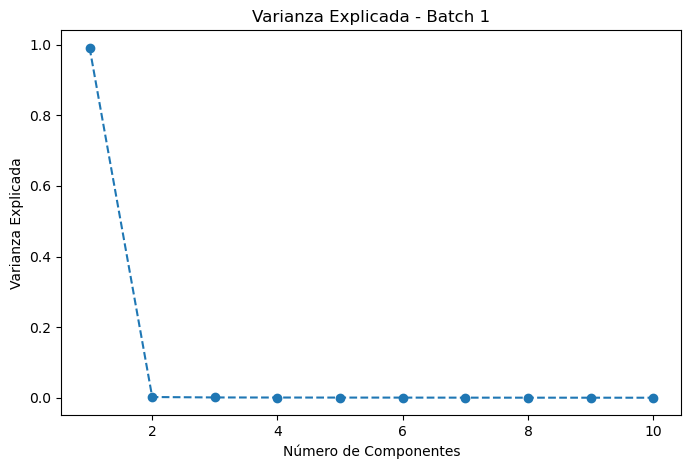

In [9]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def apply_pca(batch_df, n_components=10):
    """
    Aplica PCA a un DataFrame específico.

    Args:
        batch_df (pd.DataFrame): DataFrame preprocesado del batch.
        n_components (int): Número de componentes principales a extraer.

    Returns:
        np.array: Componentes principales del batch.
        np.array: Varianza explicada por cada componente.
    """
    # Aplicar PCA sin incluir "Time (h)"
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(batch_df.drop(columns=["Time (h)"]))

    # Varianza explicada
    explained_variance = pca.explained_variance_ratio_

    # Graficar la varianza explicada
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
    plt.xlabel("Número de Componentes")
    plt.ylabel("Varianza Explicada")
    plt.title(f"Varianza Explicada - Batch {batch_id}")
    plt.show()

    return principal_components, explained_variance

# 🔹 Aplicar PCA al batch seleccionado
pca_components, pca_variance = apply_pca(preprocessed_batch)


In [10]:
from sklearn.linear_model import LassoCV
from sklearn.cross_decomposition import PLSRegression

def feature_selection(batch_df):
    """
    Aplica Lasso y PLS para seleccionar las variables más importantes.

    Args:
        batch_df (pd.DataFrame): DataFrame preprocesado del batch.

    Returns:
        list: Variables seleccionadas por Lasso.
        list: Variables más importantes según PLS.
    """
    # Definir X e Y (excluir "Time (h)")
    X = batch_df.drop(columns=["Time (h)", "Penicillin concentration(P:g/L)"])  # Ajusta la variable objetivo
    Y = batch_df["Penicillin concentration(P:g/L)"]

    # Aplicar Lasso con validación cruzada
    lasso = LassoCV(cv=5, random_state=42)
    lasso.fit(X, Y)

    # Variables seleccionadas por Lasso
    selected_features_lasso = X.columns[lasso.coef_ != 0].tolist()

    # Aplicar PLS
    pls = PLSRegression(n_components=2)
    pls.fit(X, Y)

    # Obtener las 10 variables más importantes según PLS
    pls_importance = np.abs(pls.coef_).flatten()
    selected_features_pls = X.columns[np.argsort(pls_importance)[-10:]].tolist()

    print(f"Variables seleccionadas por Lasso: {selected_features_lasso}")
    print(f"Top 10 Variables más importantes según PLS: {selected_features_pls}")

    return selected_features_lasso, selected_features_pls

# 🔹 Aplicar selección de variables al batch seleccionado
lasso_features, pls_features = feature_selection(preprocessed_batch)


Variables seleccionadas por Lasso: ['Acid flow rate(Fa:L/h)', 'Heating/cooling water flow rate(Fc:L/h)', 'Oil flow(Foil:L/hr)', 'Batch ID', 'Fault flag', '1606', '1605', '1604', '1603', '1602', '1601', '1600', '1233', '1232', '1231', '1230', '1229', '1228', '1227', '1226', '1225', '1224', '1223', '1222', '1221', '1220', '1219', '1218', '1217', '1216', '1205', '1204', '1203', '1202', '1201', '1200', '1199']
Top 10 Variables más importantes según PLS: ['Aeration rate(Fg:L/h)', 'Sugar feed rate(Fs:L/h)', 'Heating/cooling water flow rate(Fc:L/h)', 'Substrate concentration(S:g/L)', 'Generated heat(Q:kJ)', 'Oil flow(Foil:L/hr)', 'Oxygen Uptake Rate(OUR:(g min^{-1}))', 'Air head pressure(pressure:bar)', 'Oxygen in percent in off-gas(O2:O2  (%))', 'Acid flow rate(Fa:L/h)']


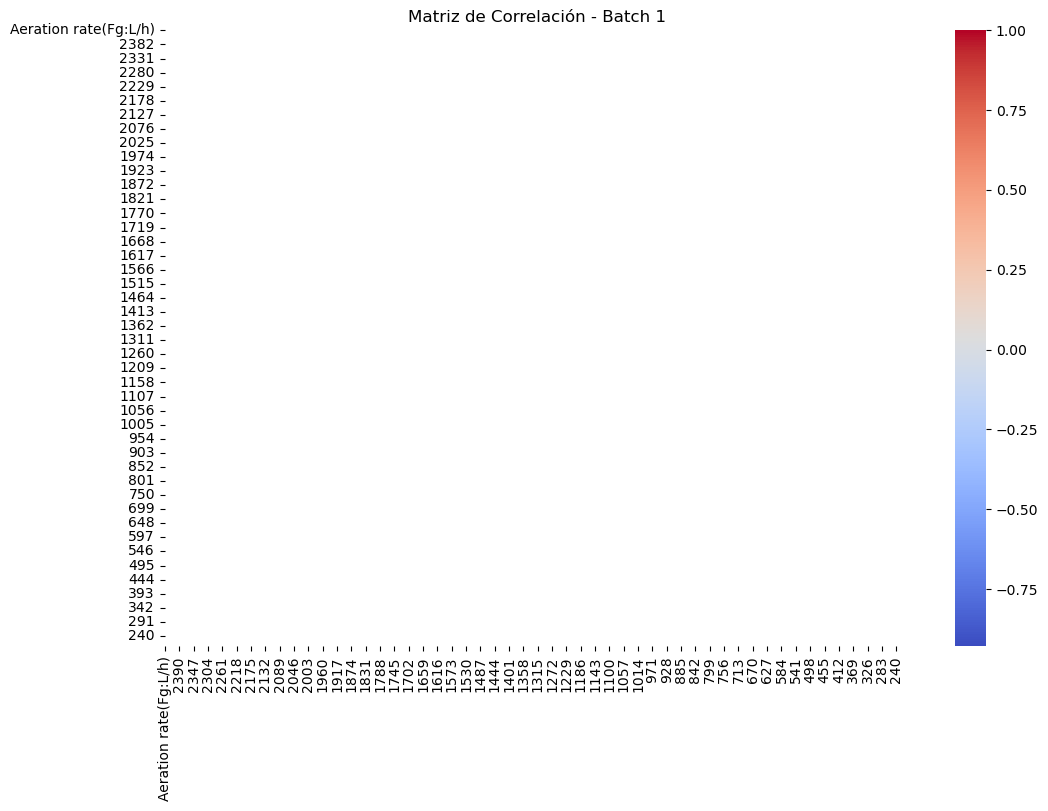

In [11]:
import seaborn as sns

def plot_correlation_matrix(batch_df):
    """
    Genera un heatmap de correlación para el batch seleccionado.

    Args:
        batch_df (pd.DataFrame): DataFrame preprocesado del batch.
    """
    # Calcular la matriz de correlación
    correlation_matrix = batch_df.drop(columns=["Time (h)"]).corr()

    # Graficar el heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)
    plt.title(f"Matriz de Correlación - Batch {batch_id}")
    plt.show()

# 🔹 Graficar la matriz de correlación del batch seleccionado
plot_correlation_matrix(preprocessed_batch)


In [12]:
from sklearn.model_selection import GroupKFold
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

def cross_validation(batch_df):
    """
    Aplica validación cruzada basada en lotes usando GroupKFold.

    Args:
        batch_df (pd.DataFrame): DataFrame preprocesado del batch.

    Returns:
        float: Promedio del R² obtenido en la validación cruzada.
    """
    # Definir los grupos
    X_train = batch_df.drop(columns=["Time (h)", "Penicillin concentration(P:g/L)"])  # ⚠️ Ajustar la variable objetivo
    y_train = batch_df["Penicillin concentration(P:g/L)"]

    # Aplicar validación cruzada basada en lotes (GroupKFold)
    gkf = GroupKFold(n_splits=5)
    ridge = Ridge(alpha=1.0)

    r2_scores = []
    for train_idx, test_idx in gkf.split(X_train, y_train, groups=batch_df.index):
        X_tr, X_te = X_train.iloc[train_idx], X_train.iloc[test_idx]
        y_tr, y_te = y_train.iloc[train_idx], y_train.iloc[test_idx]

        ridge.fit(X_tr, y_tr)
        y_pred = ridge.predict(X_te)
        r2_scores.append(r2_score(y_te, y_pred))

    print(f"Batch {batch_id} - R² promedio: {np.mean(r2_scores)}")
    return np.mean(r2_scores)

# 🔹 Aplicar validación cruzada al batch seleccionado
r2_score_avg = cross_validation(preprocessed_batch)


Batch 1 - R² promedio: 0.9998063507967538
